# DSCI 631: Final Project

## Group 03

### Group Members:
- Anamika Tiwary – at3562@drexel.edu
- Sherin K Aby – sk4387@drexel.edu


# Predicting Employee Attrition with Machine Learning

# 1.Introduction

Employee attrition — the gradual reduction in an organization's workforce due to resignations, retirements, or terminations — presents a significant challenge to businesses across industries. High attrition not only results in increased recruitment and training costs but also hampers productivity, disrupts team dynamics, and affects overall organizational morale.

Understanding the key factors influencing employee attrition and proactively identifying at-risk employees can help companies implement strategies to enhance retention. With the growing availability of HR data and advancements in machine learning, predictive analytics can play a crucial role in addressing this issue.

This project leverages the IBM HR Analytics Employee Attrition & Performance dataset to build predictive models aimed at identifying employees who are likely to leave the organization. The goal is to gain insights into the underlying reasons behind attrition and create a data-driven decision support system for HR departments.


# 2.Dataset Overview

For this project, we utilize the IBM HR Analytics Employee Attrition & Performance dataset, available on Kaggle. This dataset provides a rich collection of employee-related information that enables comprehensive analysis and predictive modeling.

**Total Records:** 1,470 employees

**Total Features:** 35 attributes (excluding the target variable)

**Target Variable:** Attrition (Binary: Yes / No) — indicating whether an employee has left the organization

**Sample Features Include:**

| Feature Name      | Description                                                         |
|-------------------|---------------------------------------------------------------------|
| `Age`             | Employee's age                                                      |
| `MonthlyIncome`   | Monthly salary of the employee                                      |
| `JobRole`         | Position held within the company                                    |
| `YearsAtCompany`  | Duration (in years) the employee has been with the company          |
| `OverTime`        | Whether the employee works overtime (*Yes* / *No*)                  |
| `JobSatisfaction` | Self-reported job satisfaction level (scale: 1 to 4)                |


This dataset is widely used in HR analytics projects and serves as an excellent foundation for understanding workforce dynamics, identifying patterns of attrition, and building predictive models to support data-driven HR decision-making.



In [1]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Dataset shape
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 1470 rows and 35 columns.


In [3]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

In [4]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [5]:
# Basic statistics for numerical features
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std     

In [6]:
# Unique values in categorical columns
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


In [7]:
# Class distribution of the target variable
print("\nAttrition value counts:")
print(df['Attrition'].value_counts())


Attrition value counts:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


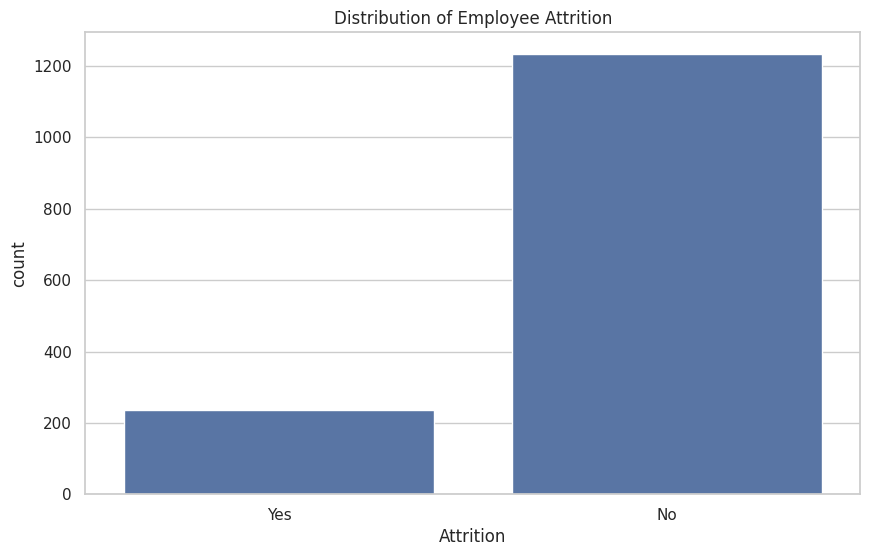

In [8]:
# Visualize Attrition distribution
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Employee Attrition')
plt.show()

The dataset contains 1,470 employee records with 35 columns (features).

Each row represents data for a single employee.

The target variable is Attrition, indicating whether an employee left the company (Yes) or stayed (No).

The dataset includes both numerical features (e.g., Age, MonthlyIncome, YearsAtCompany) and categorical features (e.g., JobRole, Gender, OverTime).

**Data Types Overview:**

Numerical columns (int64): 26

Categorical columns (object): 9

Missing values: None (all 1470 rows have complete data)

This is a clean and well-structured dataset suitable for building machine learning models to predict employee attrition and understand key contributing factors.

# 3. Exploratory Data Analysis.

In [9]:
# Convert 'Attrition' to binary for analysis
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

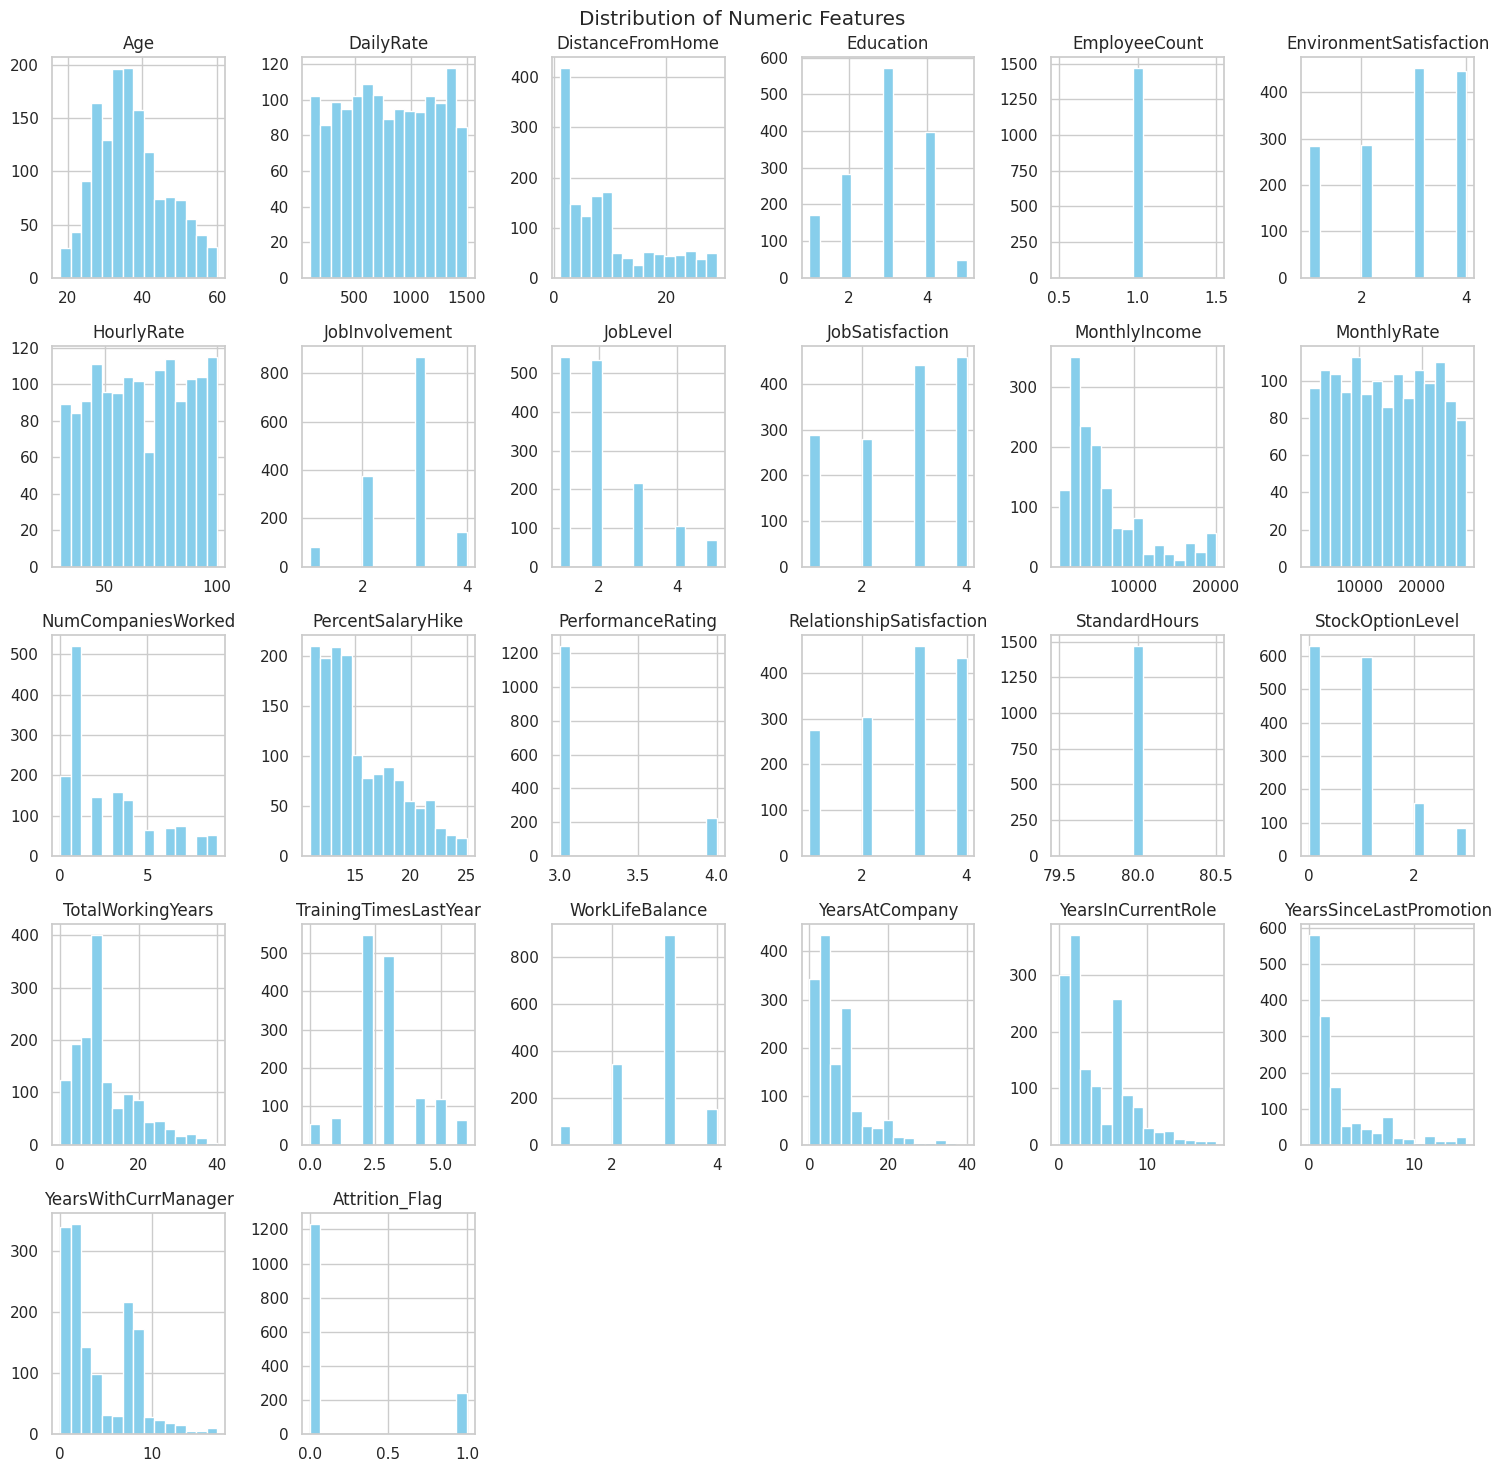

In [10]:
# Distribution of numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('EmployeeNumber')

df[numeric_cols].hist(bins=15, figsize=(15, 15), layout=(5, 6), color='skyblue')
plt.suptitle('Distribution of Numeric Features')
plt.tight_layout()
plt.show()

The figure above presents histograms for each numeric feature in the dataset, offering a snapshot of how values are distributed across employees. This helps in understanding skewness, frequency, and variability of features, which is essential for preprocessing and modeling.

Demographics & Employment Info

Age: Mostly employees are between 30 and 40 years old.

DistanceFromHome: Most employees live within 10 miles of their office.

Education: Categorical scale from 1 to 5, with most having level 3 education.

JobLevel: Most employees are at job level 1 or 2.

JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction: These are on a 1–4 scale, with most employees reporting mid-to-high satisfaction.

MonthlyIncome and TotalWorkingYears are highly skewed—most employees earn lower to mid-range incomes and have fewer years of experience.

Work Attributes

EmployeeCount and StandardHours are constant for all employees and do not provide any variance—these can be dropped.

JobInvolvement, PerformanceRating, WorkLifeBalance: Categorical ratings, but PerformanceRating shows little variance (mostly 3), which could reduce its predictive power.

YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager: These are right-skewed, indicating most employees are relatively new.

Compensation & Benefits

DailyRate, HourlyRate, MonthlyRate: Fairly uniformly distributed.

StockOptionLevel: Most employees have level 0 or 1; higher levels are rare.

PercentSalaryHike: Most hikes are in the 11-15% range.

NumCompaniesWorked: Most have worked at 0–3 companies, suggesting some loyalty or early-career employees.

Training & Promotion

TrainingTimesLastYear: Most employees trained 0–3 times.

YearsSinceLastPromotion: Highly skewed with many employees not recently promoted.

Target Variable

Attrition_Flag: This is the binary target variable (0 = no attrition, 1 = attrition). There’s class imbalance as most employees did not leave.

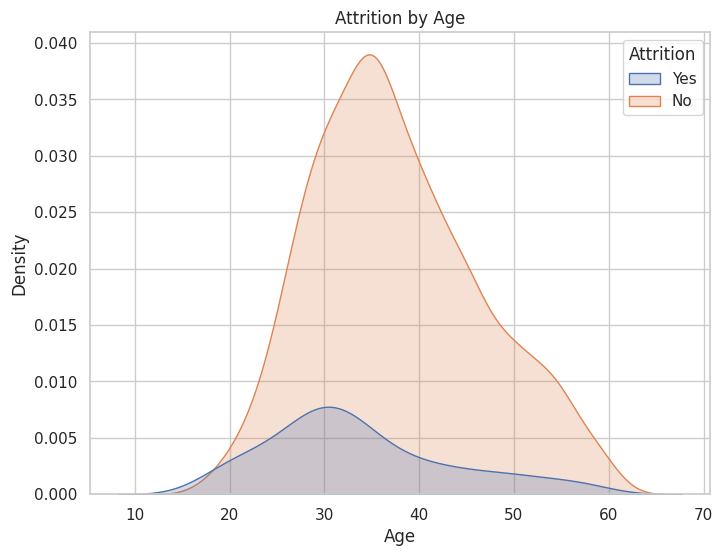

In [11]:
# Attrition by Age
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Attrition', fill=True)
plt.title('Attrition by Age')
plt.show()

This density plot shows that younger employees (around age 30) have a higher attrition rate, while older employees are more likely to stay. Attrition declines significantly after age 40. This suggests that younger employees may need more support or engagement to improve retention.

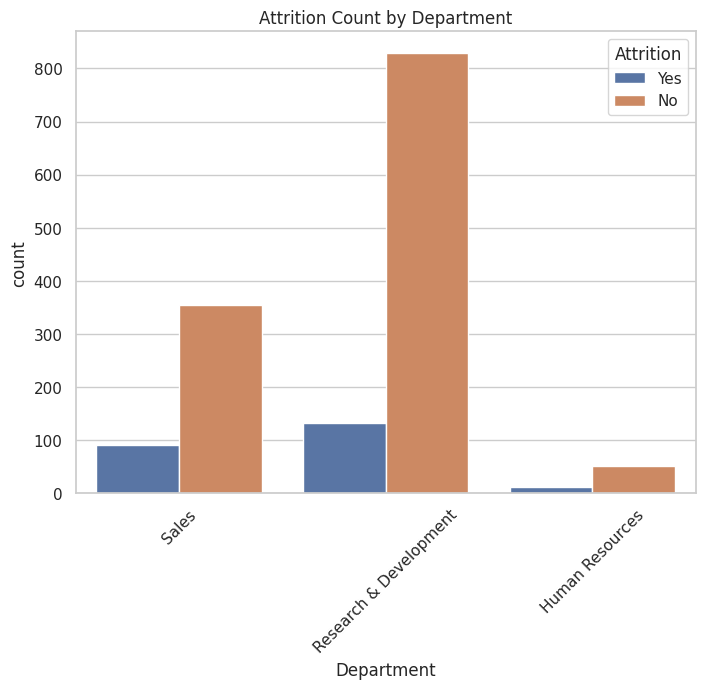

In [12]:
# Attrition by Department
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition Count by Department')
plt.xticks(rotation=45)
plt.show()

This bar plot shows the count of employees who left vs. stayed across departments:

Research & Development has the highest number of employees and attrition cases.

Sales has a notable number of attritions relative to its size.

Human Resources has the fewest employees and attritions.

Attrition is present across all departments but appears proportionally higher in Sales, suggesting a need to explore factors like workload, incentives, or job satisfaction in that department.

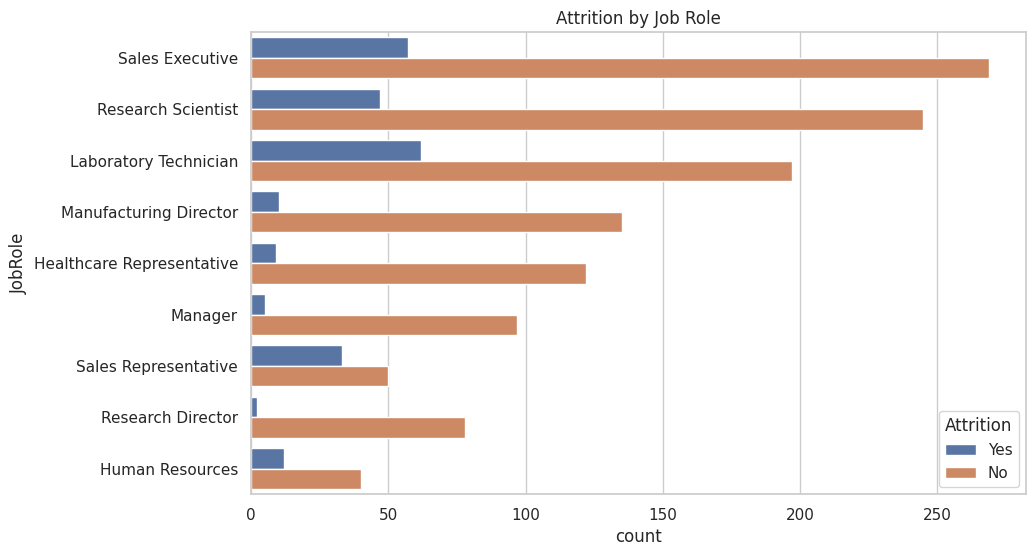

In [13]:
# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.show()

This bar chart shows how attrition varies across different job roles:

Sales Executive, Laboratory Technician, and Research Scientist have the highest number of attrition cases.

Roles like Manager, Research Director, and Manufacturing Director show very low attrition, possibly due to seniority or job stability.

Sales Representative also shows a higher attrition rate compared to other roles with similar employee counts.

Certain roles, especially in sales and technical support, may experience more stress or less satisfaction, leading to higher turnover. These roles may benefit from focused retention strategies.

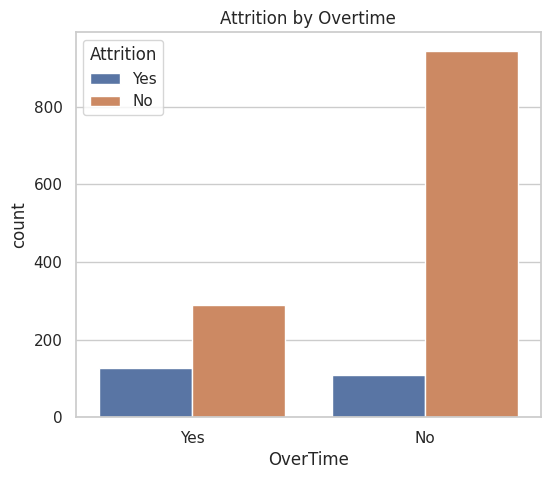

In [14]:
# Attrition by Overtime
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by Overtime')
plt.show()

This bar chart shows the relationship between overtime and employee attrition:

Employees who worked overtime had a higher rate of attrition compared to those who did not.

Even though fewer employees overall work overtime, a larger proportion of them left the organization.

Overtime appears to be a strong factor linked to attrition. Reducing excessive workloads and improving work-life balance could help retain employees.

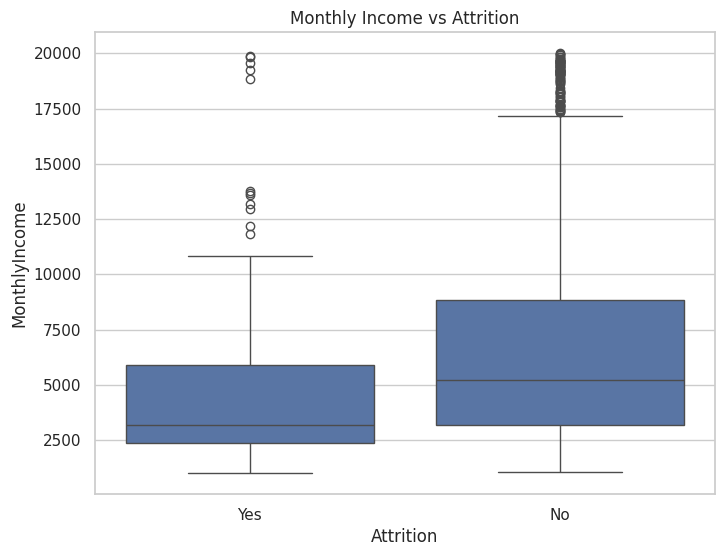

In [15]:
# Monthly Income vs Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income vs Attrition')
plt.show()

This box plot compares monthly income of employees who left vs those who stayed:

Employees who left the company tend to have lower median incomes.

Those with higher monthly incomes are less likely to leave.

Outliers exist in both groups, but the income range is clearly higher among retained employees.

Lower income may be a contributing factor to attrition. Addressing compensation fairness could help improve retention.

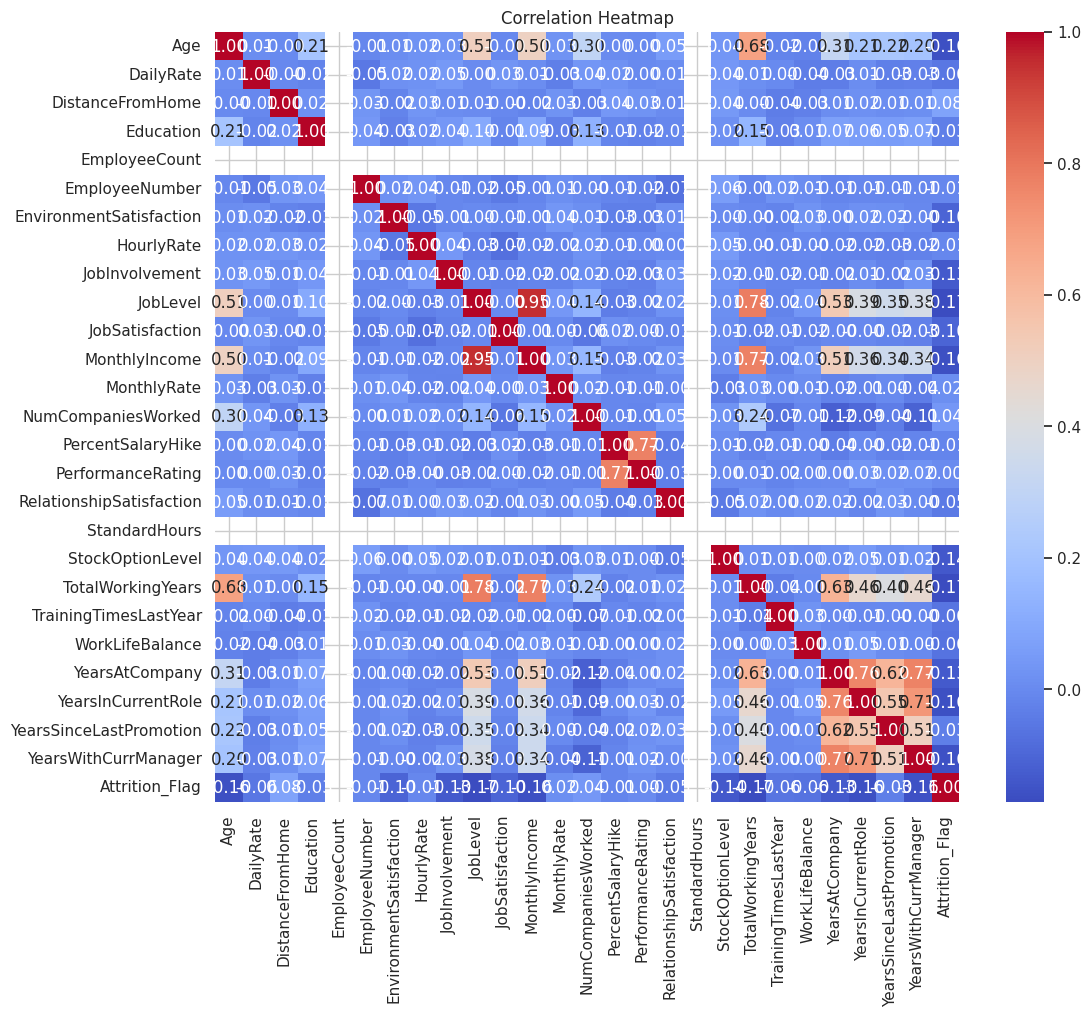

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This heatmap shows the Pearson correlation between numeric features and the target variable Attrition_Flag:

Key Findings:

Attrition_Flag is negatively correlated with:

Age (-0.16)

MonthlyIncome (-0.17)

TotalWorkingYears (-0.17)

YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager (all around -0.15 to -0.16)

These indicate that more experienced and higher-paid employees are less likely to leave.

JobLevel and MonthlyIncome have a strong positive correlation (~0.95), as expected.

Most other features have weak or no correlation, suggesting they may have limited direct impact.


# 4. Data Preprocessing

In [17]:
# Remove constant or less useful columns
# 'EmployeeCount' and 'StandardHours' are constant. 'EmployeeNumber' is just an identifier.
df = df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)

# Convert categorical features to numerical using one-hot encoding
categorical_cols_to_encode = df.select_dtypes(include=['object']).columns.tolist()

# Remove the original 'Attrition' column before encoding
if 'Attrition' in categorical_cols_to_encode:
    categorical_cols_to_encode.remove('Attrition')

df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())
print(f"\nDataFrame now has {df_encoded.shape[1]} columns after encoding.")

# Display information about the encoded dataframe
print("\nEncoded DataFrame info:")
df_encoded.info()


DataFrame after One-Hot Encoding:
   Age Attrition  DailyRate  DistanceFromHome  Education  \
0   41       Yes       1102                 1          2   
1   49        No        279                 8          1   
2   37       Yes       1373                 2          2   
3   33        No       1392                 3          4   
4   27        No        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  ...  JobRole_Laboratory Technician  JobRole_Manager  \
0                4  ...                          False            False   
1                2  ...                      

# 5. Feature Engineering

In [18]:
import numpy as np

#Income over tenure (proxy for overall earning power)
df['Income_Years'] = df['MonthlyIncome'] * df['YearsAtCompany']

#Ratio of years at company to total working years (loyalty metric)
df['YearsRatio'] = df['YearsAtCompany'] / df['TotalWorkingYears']
df['YearsRatio'] = df['YearsRatio'].replace([np.inf, -np.inf], 0).fillna(0)

#Age Group Bucketing
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[18, 25, 35, 45, 55, 65],
                         labels=['18-24', '25-34', '35-44', '45-54', '55-65'],
                         right=False)

#Interaction features (multiplying satisfaction scores)
df['Job_Env_Satisfaction'] = df['JobSatisfaction'] * df['EnvironmentSatisfaction']
df['WorkLife_JobInv'] = df['WorkLifeBalance'] * df['JobInvolvement']

#One-hot encode new categorical column 'Age_Group'
df = pd.get_dummies(df, columns=['Age_Group'], prefix='Age')

print("New columns added:")
print(['Income_Years', 'YearsRatio', 'Job_Env_Satisfaction', 'WorkLife_JobInv'] +
      [col for col in df.columns if col.startswith('Age_')])


New columns added:
['Income_Years', 'YearsRatio', 'Job_Env_Satisfaction', 'WorkLife_JobInv', 'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-65']


In [21]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
# Make sure to drop the original 'Attrition' column as we are using 'Attrition_Flag'
if 'Attrition' in df_encoded.columns:
    df_encoded = df_encoded.drop('Attrition', axis=1)

X = df_encoded.drop('Attrition_Flag', axis=1)
y = df_encoded['Attrition_Flag']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets:
X_train shape: (1102, 44)
X_test shape: (368, 44)
y_train shape: (1102,)
y_test shape: (368,)


To enhance predictive power and incorporate domain knowledge, we created the following new features:

Income_Years: Total income earned during an employee's tenure, calculated as MonthlyIncome × YearsAtCompany. This feature helps capture long-term value contributed by the employee.

YearsRatio: Ratio of YearsAtCompany to TotalWorkingYears, representing the proportion of an employee's career spent at the current organization. It serves as a proxy for loyalty and company attachment.

Age_Group: Bucketed version of the Age column using defined age intervals (18-24, 25-34, etc.). One-hot encoding was applied to make this categorical variable usable for modeling. This helps reveal attrition patterns across age segments.

Job_Env_Satisfaction: Interaction term combining JobSatisfaction and EnvironmentSatisfaction. It reflects overall workplace satisfaction and engagement.

WorkLife_JobInv: Product of WorkLifeBalance and JobInvolvement, designed to measure how work-life harmony relates to an employee’s involvement level.

These engineered features help capture latent relationships and interactions that may not be obvious from the raw attributes, improving the model’s ability to detect attrition risk.

#6. Applying SMOTE

In [23]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nShape of training data after SMOTE:")
print(f"X_train_smote shape: {X_train_smote.shape}")
print(f"y_train_smote shape: {y_train_smote.shape}")

print("\nClass distribution in y_train before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution in y_train after SMOTE:")
print(y_train_smote.value_counts())


Shape of training data after SMOTE:
X_train_smote shape: (1848, 44)
y_train_smote shape: (1848,)

Class distribution in y_train before SMOTE:
Attrition_Flag
0    924
1    178
Name: count, dtype: int64

Class distribution in y_train after SMOTE:
Attrition_Flag
0    924
1    924
Name: count, dtype: int64


# 7. Model Building and Tuning.

 Evaluating models using 5-fold cross-validation (ROC AUC):

Logistic Regression: 0.9492 (+/- 0.0039)
Random Forest: 0.9789 (+/- 0.0045)
Gradient Boosting: 0.9670 (+/- 0.0058)
Support Vector Machine: 0.6499 (+/- 0.0151)
K-Nearest Neighbors: 0.8449 (+/- 0.0222)
Decision Tree: 0.8336 (+/- 0.0177)
Neural Network: 0.6090 (+/- 0.0418)

 Best model based on ROC AUC: Random Forest

 Tuning hyperparameters for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV ROC AUC: 0.9769202686823133

 Training the final model: Random Forest
Training completed in 0.79 seconds.

 Test Set Performance:
Accuracy: 0.8315
Precision: 0.4483
Recall: 0.2203
F1 Score: 0.2955
ROC AUC: 0.7207

Adjusted Threshold Evaluation (Threshold = 0.3):
Accuracy: 0.7446
Precision: 0.3394
Recall: 0.6271
F1 Score: 0.4405

Adjusted Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.83       309
           1   

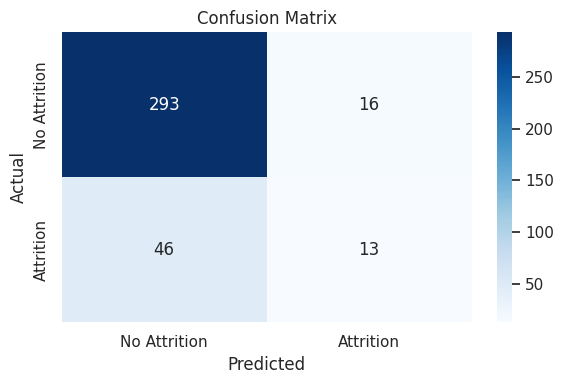

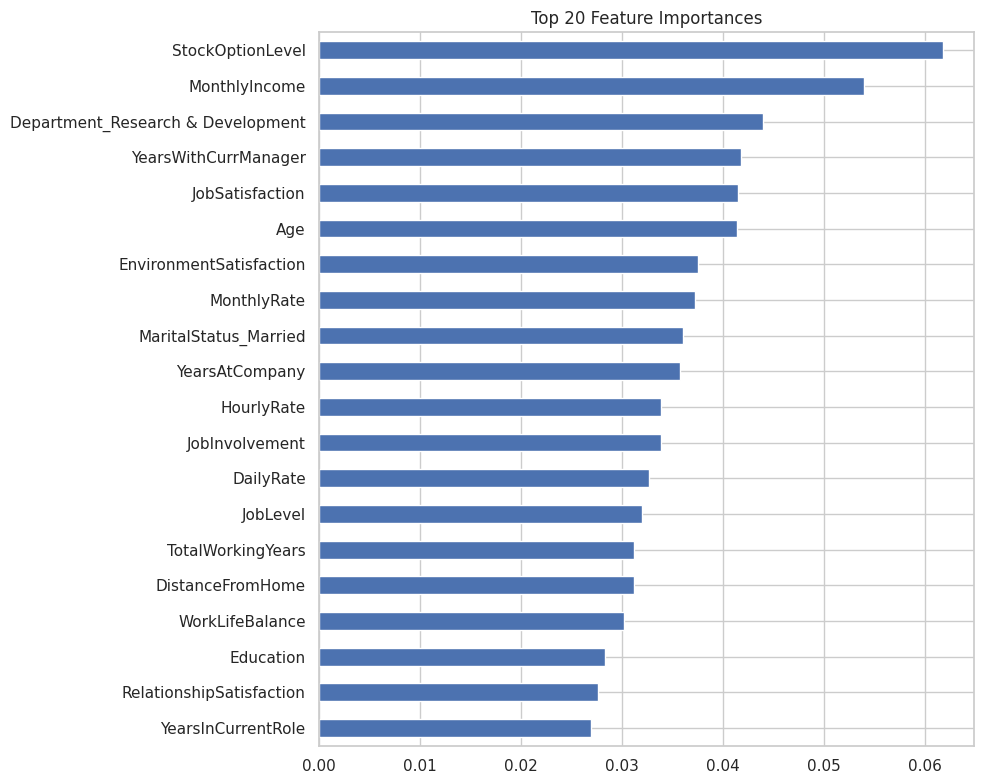

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define Models
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Cross-Validation (ROC AUC)
print(" Evaluating models using 5-fold cross-validation (ROC AUC):\n")
cv_results = {}
for name, model in models.items():
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='roc_auc')
    cv_results[name] = scores
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Select Best Model
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\n Best model based on ROC AUC: {best_model_name}")
best_model = models[best_model_name]

# GridSearch for Top Models
if best_model_name == 'Logistic Regression':
    param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
else:
    param_grid = None

if param_grid:
    print(f"\n Tuning hyperparameters for {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)
    print("Best CV ROC AUC:", grid_search.best_score_)

# Train Final Model
print(f"\n Training the final model: {best_model_name}")
start = time.time()
best_model.fit(X_train_smote, y_train_smote)
end = time.time()
print(f"Training completed in {end - start:.2f} seconds.")

# Evaluate on Test Set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Threshold tuning for better recall
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

print("\nAdjusted Threshold Evaluation (Threshold = 0.3):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_adjusted):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_adjusted):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_adjusted):.4f}")
print("\nAdjusted Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10, 8))
    importances.head(20).plot(kind='barh')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    coef = pd.Series(best_model.coef_[0], index=X_train.columns)
    coef.abs().sort_values(ascending=False).head(20).plot(kind='barh')
    plt.title('Top 20 Coefficients (Absolute)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


# 8. Summary of results

To predict employee attrition effectively, we evaluated a range of classification models using 5-fold cross-validation with ROC AUC as the key performance metric. The dataset was carefully preprocessed, balanced using SMOTE, and enhanced with domain-specific feature engineering.

Cross-Validation Insights
Among all the models tested, Random Forest emerged as the best performer with a ROC AUC of 0.9789, followed closely by Gradient Boosting (0.9670) and Logistic Regression (0.9492). These high scores indicate that the models were able to distinguish between employees likely to leave and those who would stay with a high degree of accuracy on unseen data during cross-validation.

Lower performance was observed with models like SVM and Neural Networks, which may be more sensitive to the feature scaling and class imbalance despite SMOTE balancing.

Hyperparameter Tuning
We performed hyperparameter tuning using GridSearchCV for the top-performing model – Random Forest. The best parameters identified were:

n_estimators: 200

max_depth: None

min_samples_split: 2

This optimized model retained strong ROC AUC performance during cross-validation, reaffirming its generalizability.

Test Set Evaluation
On the held-out test set, the Random Forest model achieved:

Accuracy: 83.15%

Precision: 44.83%

Recall: 22.03%

F1 Score: 29.55%

ROC AUC: 0.7207

While the overall accuracy and precision were decent, the recall for the positive (attrition) class was low. This indicates that many actual attrition cases were not being correctly identified.

Adjusting the Classification Threshold
To address the low recall, we lowered the decision threshold from 0.5 to 0.3, trading off a bit of precision to better capture attrition cases. The results significantly improved:

Recall increased to 62.71%

F1 Score improved to 44.05%

Accuracy dropped slightly to 74.46%

This trade-off is justified in business contexts where missing a potential attrition case is more costly than issuing a false alarm.



# 9. Key Takeaways

Random Forest is the most reliable model for this problem, with strong cross-validation and test set results.

Threshold tuning is essential when working with imbalanced classification problems like employee attrition.

Feature engineering and SMOTE balancing improved the model’s ability to generalize.

There's a clear trade-off between precision and recall – and depending on business priorities, this threshold can be fine-tuned.

# 10. Conclusion & Business Insights

This project successfully built a machine learning pipeline to predict employee attrition, leveraging the IBM HR Analytics dataset. After thorough data preprocessing, feature engineering, class balancing with SMOTE, and extensive model evaluation, we identified Random Forest as the best-performing model. Adjusting the classification threshold further improved recall, making the model more effective for real-world retention strategies.

**Business Insights:**
1. Attrition is Predictable with Key Indicators
Variables such as Monthly Income, Job Satisfaction, Years at Company, Work-Life Balance, and Job Involvement were found to be influential in predicting attrition risk. These factors reflect both compensation and employee engagement levels.

2. High Accuracy, But Watch Recall
The base model had strong accuracy (83%) but low recall for attrition cases (22%). This means many potential leavers would be missed. By adjusting the threshold to 0.3, we raised recall to 63%, which is more aligned with business goals of early intervention.

3. Income vs. Tenure (Income_Years) Is a Valuable Metric
One of the engineered features, Income_Years, provided insight into an employee’s earning potential over time, which helps uncover dissatisfaction due to pay stagnation.

4. Balanced Data is Crucial for Fair Learning
Using SMOTE addressed the imbalance (only ~15% attrition cases), preventing the model from favoring the majority class and enhancing fairness in predictions.

**Recommendations for HR & Leadership**
1. Targeted Retention Efforts
Focus retention programs on employees showing high attrition risk based on model predictions—especially those with low satisfaction, poor work-life balance, or low involvement.

2. Salary Reviews & Growth Opportunities
Employees with low Income_Years or those in mid-career without progression should be reviewed for compensation and career path opportunities.

3. Monitor Key Engagement Metrics
Continually track features like job satisfaction, environment satisfaction, and work-life balance using internal surveys or performance reviews.

4. Deploy Predictive Tool as Dashboard
Integrate the model into an HR dashboard to flag high-risk employees monthly, enabling proactive conversations and retention planning.



# 11. Future Work

While the current model provides valuable insights into employee attrition, there are several opportunities to enhance the analysis and its business impact further:

1. Deploy as a Real-Time HR Tool

  Build an interactive dashboard or integrate the model into an HR system to allow real-time scoring of employees for attrition risk, supporting timely interventions.

2. Incorporate External and Qualitative Data
    
  Enrich the dataset with:

    * Exit interview feedback
    * Engagement survey responses
    * Salary benchmarks from industry

  These could provide deeper behavioral and motivational signals beyond internal metrics.

3. Temporal & Sequential Modeling
   
   Consider longitudinal approaches like:

  *  Time-series modeling of performance, satisfaction, or promotions
  *  Event-based models (e.g., recent demotion, manager change)

  This can uncover patterns of attrition over time.

4. Test Ensemble or Advanced Models

  Explore:

  *  Stacking or voting classifiers
  *  XGBoost or LightGBM
  *  Explainable AI tools (e.g., SHAP) for deeper model interpretation

  These could improve performance while maintaining interpretability.

5. Model Drift and Re-Training
Establish a pipeline for ongoing model monitoring to detect changes in attrition behavior over time and automatically retrain the model with updated data.

6. Fairness & Bias Evaluation

  Conduct fairness audits to ensure the model:

  *  Does not favor or penalize groups based on age, gender, department, etc.
  *  Meets ethical HR standards for deployment







